In [1]:
import numpy as np
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
import matplotlib.image as img
from mpl_toolkits.mplot3d import Axes3D

## Übung 2

Gegeben sind die RGB-Daten eines Bildes:

In [2]:
rgb_data = img.imread('example_figures/facing_python.jpg')
rgb_data.shape


(600, 441, 3)

1) Zeigen Sie das Bild an (Tipp: `plt.imshow`)

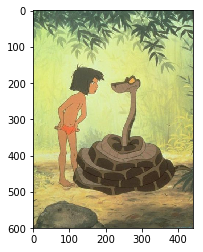

In [3]:
# Bild anzeigen...
plt.imshow(rgb_data)

2) Rechnen Sie das Bild in Graustufen um, indem Sie den Mittelwert aus Rot-, Blau- und Grün-Anteil ausrechnen.

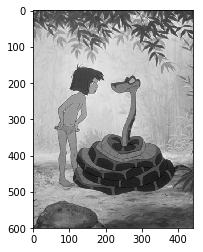

In [4]:
# Bild als Graustufen anzeigen...
plt.imshow(np.mean(rgb_data, axis=2), cmap='gray')

3 ) Erzeugen Sie ein Array `flat_data`, welches alle RGP-Triplets enthält, aber keine Informationen mehr über die Koordinaten der Pixel (Tipp: `reshape`).

(264600, 3)


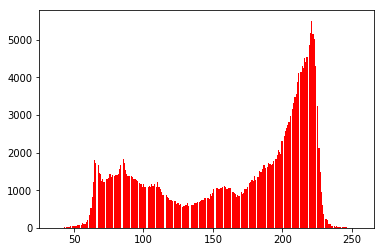

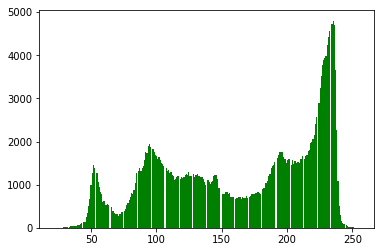

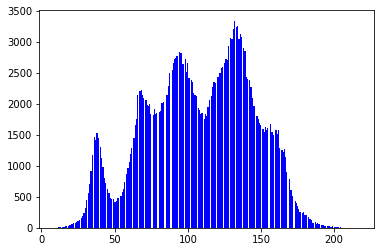

In [5]:
# Farbwerte als Array (x, 3) oder (3, x)
# flat_data = ...
flat_data = rgb_data.reshape(-1, 3)
print(flat_data.shape)
plt.hist(flat_data[:,0], bins=255, fc='red')
plt.figure()
plt.hist(flat_data[:,1], bins=255, fc='green')
plt.figure()
plt.hist(flat_data[:,2], bins=255, fc='blue')

None

4) Erzeugen Sie je ein Histogram für den roten, blauen und grünen Farbkanal (analog zum Beispielbild) - Tipp: `plt.hist`
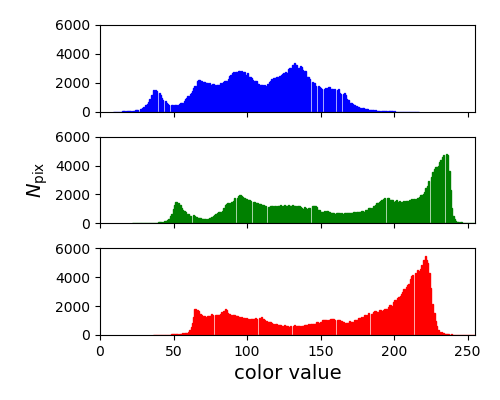

In [6]:
# histogramme erzeugen

5) Erzeugen Sie einen 3D-Scatterplot mit den Farbdaten - die drei Achsen sind dabei der Rot-, Grün-, und Blau-Wert. Jeder hunderste Pixel soll dabei in seiner tatsächlichen Farbe in dem Scatterplot eingetragen werden.

(0, 255)

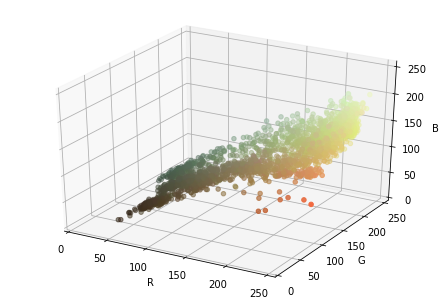

In [7]:
fig3 = plt.figure()
ax = Axes3D(fig3)
ax.scatter(flat_data[::100, 0], flat_data[::100, 1],
           flat_data[::100, 2], color=flat_data[::100] / 255.0)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim3d([0, 255])
ax.set_ylim3d([0, 255])
ax.set_zlim3d([0, 255])

6) Nutzen Sie die Funktion `kmeans2`, um die Farbdaten in 5 Cluster zu gruppieren. Zeichnen Sie die Zentren der gefundenen Cluster in den Scatterplot.

(264600, 3)
[0 0 0 ... 2 2 2]


(0, 255)

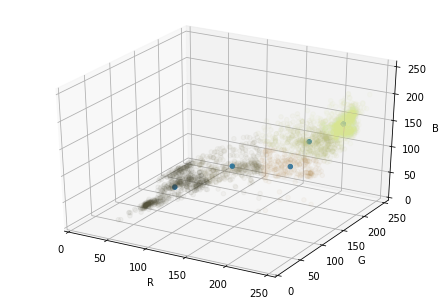

In [8]:
centroids, labels = kmeans2(flat_data.astype(float), 5)

print(flat_data.shape)
print(labels)

fig4 = plt.figure()
ax = Axes3D(fig4)
ax.scatter(flat_data[::100, 0], flat_data[::100, 1],
           flat_data[::100, 2], color=centroids[labels[::100]] / 255.0, alpha=0.05)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 'k*', alpha=1.0)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim3d([0, 255])
ax.set_ylim3d([0, 255])
ax.set_zlim3d([0, 255])

7) Reduzieren Sie das ursprüngliche Bild auf 5 Farben, indem Sie jeden Pixel durch die Farbe des naheliegensten Clusterzentrums ersetzen und plotten Sie das resultierende Bild mit `imshow`. Tipp: Wenn Sie alle Rückgabewerte der `kmeans2`-Funktion nutzen, reicht dies aus, um das Bild zu erzeugen.

(264600, 3)


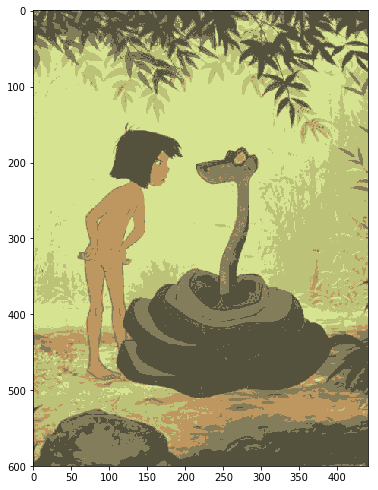

In [9]:
c5_data = centroids[labels] / 256.0
print(c5_data.shape)

c5_data = c5_data.reshape(rgb_data.shape)
plt.figure(figsize=(6,10))
plt.imshow(c5_data)